In [102]:
"""
First Class
"""
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#load data
Location = './orders_new.csv'
orders_df = pd.read_csv(Location)

orders_df.info()
orders_df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39958 entries, 0 to 39957
Data columns (total 7 columns):
country          39958 non-null object
date             39958 non-null object
experiment_id    39958 non-null int64
order_id         39958 non-null object
spend_usd        39958 non-null float64
user_id          39958 non-null object
vertical         39958 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 2.1+ MB


,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


**Question1**
How do you handle duplicate values in a dataset in Python?

df.drop_duplicates(['col_name'], keep='last')   

**Question 2 :**  

You are given two tables - friend_request and request_accepted.
Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, 
acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 

**SQL solution**

```sql
SELECT float(accept_num)/request_num as acceptance rate
FROM
(SELECT count(ra.request_id) as accept_num, count(fr.request_id) as request_num
FROM friend_request fr LEFT JOIN request_accepted ra ON (fr.request_id = ra.request_id and fr.sent_to_id = ra.acceptor_id)) t
```

**Python solution**

```python
pd.merge(friend_request, request_accepted, how = 'left', left_on = ['request_id','sent_to_id'], right_on = ['request_id','acceptor_id']
acceptance_rate = count(friend_accept["request_id"])/float(len(friend_request))  
```

**Question 3**

Do some research and summarize the business model of your dream company, or company that you interview with.
What is the product
Who are the customer
How do they make money
Why do you want to work for this company?
(Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?


**Answer**
I will have an interview of a startup named D, which is growing fast in the field of food delivery. 


What is the product?
D provides a platform for food delivering. The restaurants in a partnership with D can be found in the D’s ordering
page, and for the customers, they can make purchase and wait for the food delivering service by D’s delivery 
specialist named Dasher. 
   
Who are the customer?
Two types of customer. One is Restaurants, the other is the individual customer. 
   
How do they make money? (Business Model)
By providing a platform of food delivering. The restaurants in partnership would pay D for the useage of the platform
as an intermmediary agent, and I guess the payment should be proportional with the ordering amount. Besides, for the individual customers who order food on D would pay the deliveryman shipping fee. D can earn money from the shipping service, competing with the UPS, Amazon fresh, etc.. From my understanding, D may have profit of Advertising or ranking (like the sponsored AD in google) when the customer using their search for food nearby.
   
Why do you want to work for this company?
Firstly, the size of this company is moderate and I think I may have chance to do impactful work here. It provides 
SQL bootcamp and would stay iteratively in the department of Data Analytics, Product, Engineer, etc.. which is a good
chance to understanding the logic flow and relationship between each of these departments;

Secondly, D creates jobs for the deliveryman. It is the most popular company based on the idea of 'sharing economy'.
And I think it may have a great growing potential;

More sepcifically, the position I am applying would deal with the company's growing data. I can apply my knowledge in
statistics to the data analytics and uncover the values hidden in these data. I have passion in the analytics role and
want to be an excellent Data Analyst in the future.
   


**Second Class**

**Question1**

Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:
 
The function takes three inputs:
experiment_id
country
vertical
 
The function produces two outputs:
A time series chart showing the cumulative uplift (hint: search for cumsum)
Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %

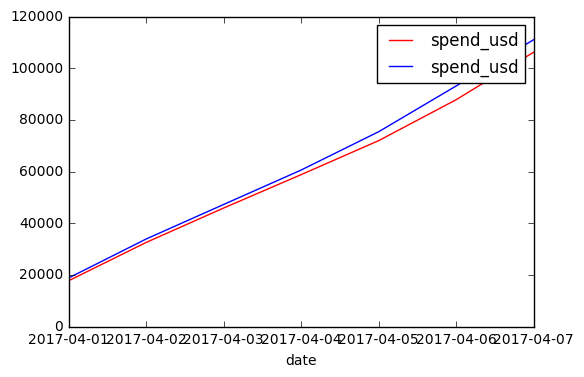

In [124]:
import datetime

np.unique(orders_df["experiment_id"])
#experiment_id indicates the red_button or blue_button
#red_button=12624548
#blue_button=12624549

def PrintDailyTimeSeries(orders_df, experiment_id, country, vertical):
    # subset the data by the function parameters
    sub_data1 = orders_df.loc[(orders_df.experiment_id == experiment_id) & (orders_df.country == country) & (orders_df.vertical == vertical)]
    sub_data2 = orders_df.loc[(orders_df.experiment_id != experiment_id) & (orders_df.country == country) & (orders_df.vertical == vertical)]

    # group by date
    grouped_date_sum1 = sub_data1.groupby('date')['spend_usd'].sum()
    cumsum1 = pd.DataFrame(data=grouped_date_sum1).spend_usd.cumsum()
    
    grouped_date_sum2 = sub_data2.groupby('date')['spend_usd'].sum()
    cumsum2 = pd.DataFrame(data=grouped_date_sum2).spend_usd.cumsum()
    
    #Plot Time series line chart
    plt.figure()
    cumsum1.plot(color = 'red')
    cumsum2.plot(color = 'blue')

    plt.legend()
    plt.show()
    

PrintDailyTimeSeries(orders_df, 12624548, 'US','ANDROID_APPS')
    
  


**Question2**
Using our data, draw a histogram which plots both US and JP data on the same plot.

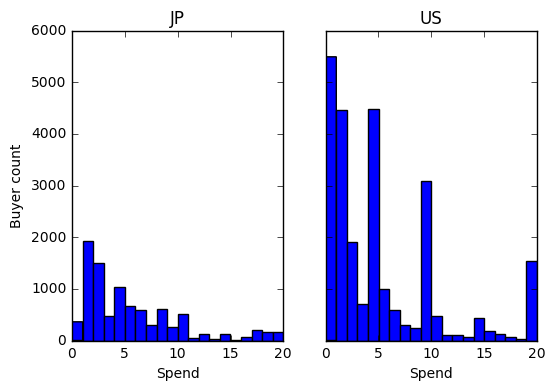

In [137]:
series_jp = orders_df["spend_usd"][(orders_df.spend_usd < 20) & (orders_df.country == "JP")]
series_us = orders_df["spend_usd"][(orders_df.spend_usd < 20) & (orders_df.country == "US")]
# play with it first
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].hist(series_jp, bins=20)
ax[1].hist(series_us, bins=20)

ax[0].set_title("JP")
ax[1].set_title("US")
ax[0].set_ylabel("Buyer count")
ax[0].set_xlabel("Spend")
ax[1].set_xlabel("Spend")

#titanic = pd.read_csv('titanic_data.csv')
#survival_by_age = titanic.groupby(['Age', 'Survived']).size().unstack('Survived')
#survival_by_age.columns = ['No', 'Yes']
#survival_by_age.plot.bar(title='Survival by Age')

plt.show()




In [156]:
#histogram by group in one graph
#overlap and 
plt.figure()
plt.hist(series_jp, bins=20, color = 'red')
plt.hist(series_us, bins=20, color = 'blue', alpha = 0.5)

fig, ax = plt.subplots()
ax.set_title("Frequency of spending under $20 for US and JP")
plt.legend()
plt.show()

**Question3**
(Optional) Write a function that can plot 10 (instead of 2) time series in our data.

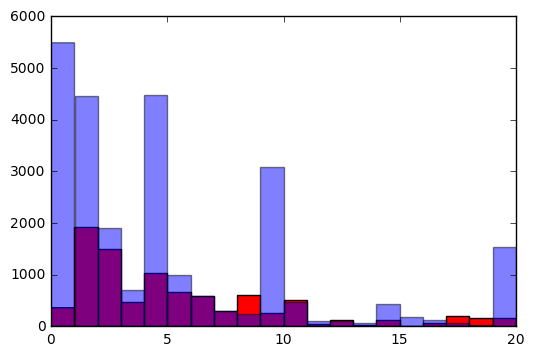

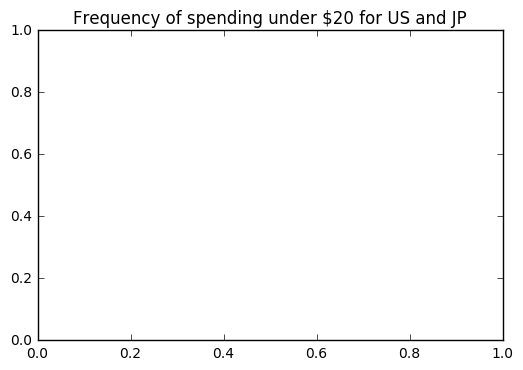

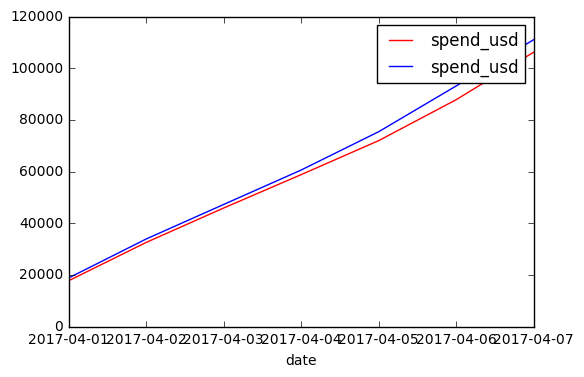

In [157]:
def PrintDailyTimeSeries_N(orders_df, experiment_id, country, vertical):
    # subset the data by the function parameters
    sub_data1 = orders_df.loc[(orders_df.experiment_id == experiment_id) & (orders_df.country == country) & (orders_df.vertical == vertical)]
    sub_data2 = orders_df.loc[(orders_df.experiment_id != experiment_id) & (orders_df.country == country) & (orders_df.vertical == vertical)]

    # group by date
    grouped_date_sum1 = sub_data1.groupby('date')['spend_usd'].sum()
    cumsum1 = pd.DataFrame(data=grouped_date_sum1).spend_usd.cumsum()
    
    grouped_date_sum2 = sub_data2.groupby('date')['spend_usd'].sum()
    cumsum2 = pd.DataFrame(data=grouped_date_sum2).spend_usd.cumsum()
    
    #Plot Time series line chart
    plt.figure()
    cumsum1.plot(color = 'red')
    cumsum2.plot(color = 'blue')

    plt.legend()
    plt.show()
    

PrintDailyTimeSeries(orders_df, 12624548, 'US','ANDROID_APPS')
    

In [162]:
#array
#col array ??? two sqaure bracket
row_vec = np.array([1,2])
print row_vec
col_vec = np.array([[1],[2]])
print col_vec

a = np.array([1,2,3,4])
len(a)
a.sum()
a.max()


[1 2]
[[1]
 [2]]
